# Visualisation of World Economic Forum's Global Gender Gap Report

This notebook allows to "manually" visualise the data provided by the WEF. An interactive data explorer is provided by the WEF at: http://reports.weforum.org/global-gender-gap-report-2018/data-explorer/

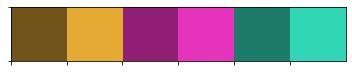

In [102]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import json
import requests

plt.rcParams['figure.facecolor']='#ffffff'
plt.rcParams['axes.facecolor']='#ffffff'
flatui = ["#705319", "#e5aa34", "#911f76", "#e534bb", "#1c7c69", "#31d6b5", ]
flatui3 = ["#e5aa34", "#e534bb", "#31d6b5", ]
sns.palplot(sns.color_palette(flatui))

In [103]:
r = requests.get('http://reports.weforum.org/global-gender-gap-report-2018/wp-content/themes/wef-reports/wef-components/dist/static/data/ggi/2017-2018/data.json')
a = json.loads(r.text)

In [92]:
metrics = [
    'Economic participation and opportunity', 
    'Labour force participation', 
    'Wage equality for similar work (survey)', 
    'Estimated earned income (PPP, US$)', 
    'Legislators, senior officials and managers', 
    'Professional and technical workers', 
    'Educational attainment', 
    'Literacy rate', 
    'Enrolment in primary education', 
    'Enrolment in secondary education', 
    'Enrolment in tertiary education', 
    'Health and survival', 
    'Sex ratio at birth', 
    'Healthy life expectancy', 
    'Political empowerment', 
    'Women in parliament ', 
    'Women in ministerial positions', 
    'Years with female head of state (last 50)']
metrics_with_ratios = [
    'Labour force participation', 
    'Estimated earned income (PPP, US$)', 
    'Legislators, senior officials and managers', 
    'Professional and technical workers', 
    'Literacy rate', 
    'Enrolment in primary education', 
    'Enrolment in secondary education', 
    'Enrolment in tertiary education', 
    'Healthy life expectancy', 
    'Women in parliament ', 
    'Women in ministerial positions', 
    'Years with female head of state (last 50)']

In [93]:
data = {'country':[], 'variable':[], 'male':[], 'female':[]}
for country in a['countries'].keys():
    for m in metrics:
        data['country'].append(country)
        data['variable'].append(m)
        try:
            male = np.float(a['countries'][country]['countryScoreCard'][m]['male'])
        except ValueError:
            male = np.nan
        try:
            female = np.float(a['countries'][country]['countryScoreCard'][m]['female'])
        except ValueError:
            female = np.nan

        data['male'].append(male)
        data['female'].append(female)
df = pd.DataFrame(data)

In [94]:
df['ratio'] = df['female']/df['male']
df['mf_ratio'] = df['male']/df['female']

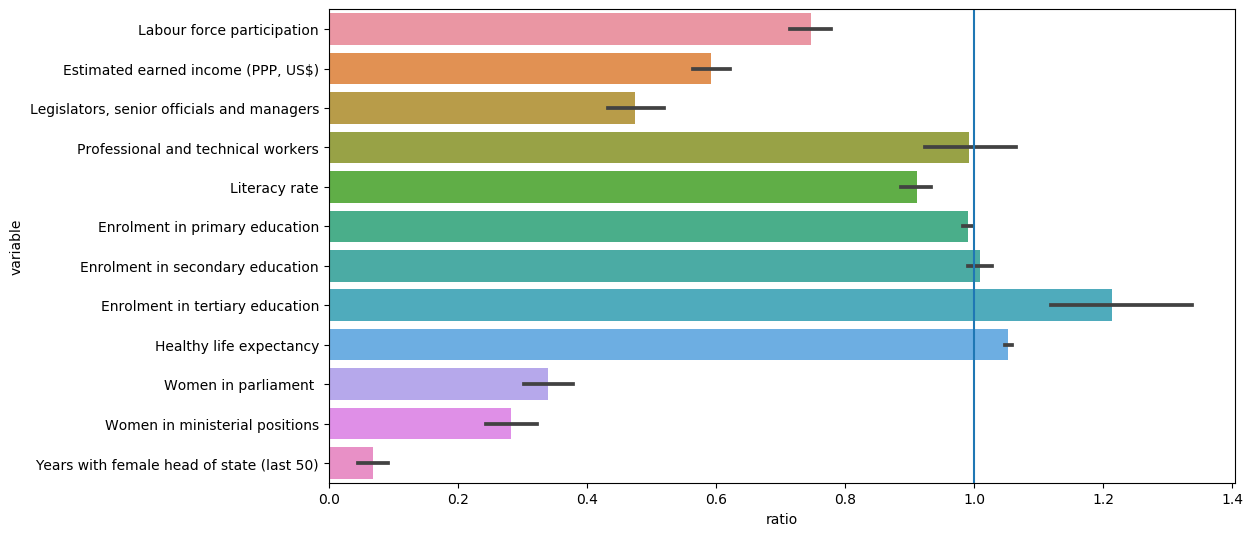

In [95]:
fig, ax = plt.subplots(figsize=(11.7, 6.27), dpi=100)
g = sns.barplot(y='variable', x='ratio', data=df[df['variable'].isin(metrics_with_ratios)], ax=ax)
ax.axvline(x=1)
plt.show()
plt.close(fig)

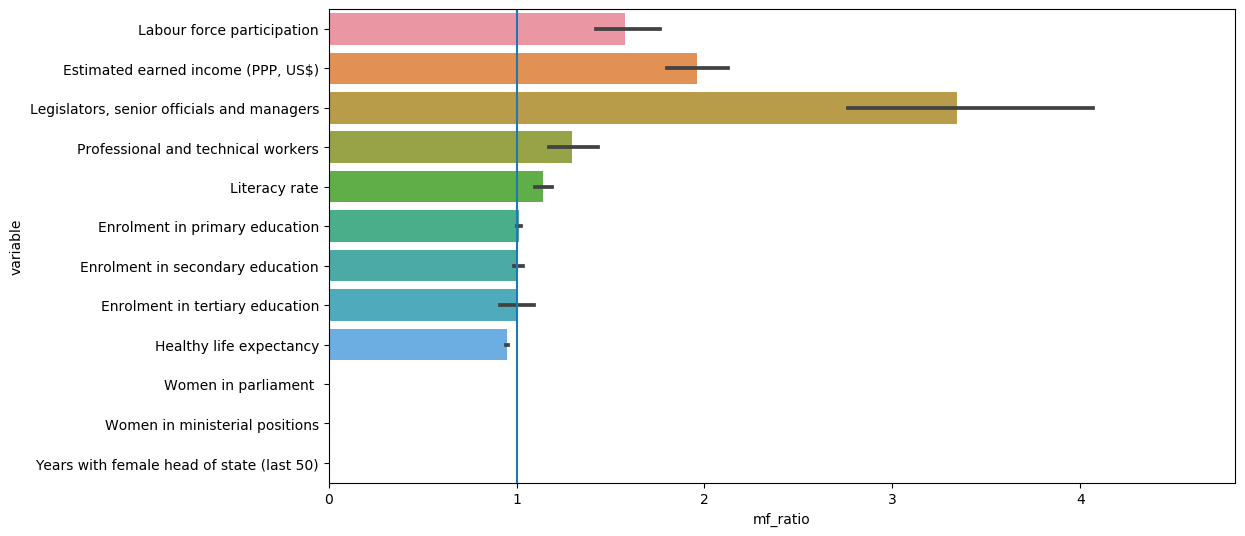

In [96]:
fig, ax = plt.subplots(figsize=(11.7, 6.27), dpi=100)
g = sns.barplot(y='variable', x='mf_ratio', data=df[df['variable'].isin(metrics_with_ratios)], ax=ax)
ax.axvline(x=1)
plt.show()
plt.close(fig)

In [97]:
data_2 = {'country':[], 'variable':[], 'male':[], 'female':[]}
for country in a['countries'].keys():
    for element in a['countries'][country]['page2'][0]['indicators']:
        if 'male' in element.keys():
            data_2['country'].append(country)
            data_2['variable'].append(element['label'])
            try:
                male = np.float(element['male'])
            except ValueError:
                male = np.nan
            try:
                female = np.float(element['female'])
            except ValueError:
                female = np.nan

            data_2['male'].append(male)
            data_2['female'].append(female)
df2 = pd.DataFrame(data_2)

In [98]:
df2['ratio'] = df2['female']/df2['male']
df2['mf_ratio'] = df2['male']/df2['female']

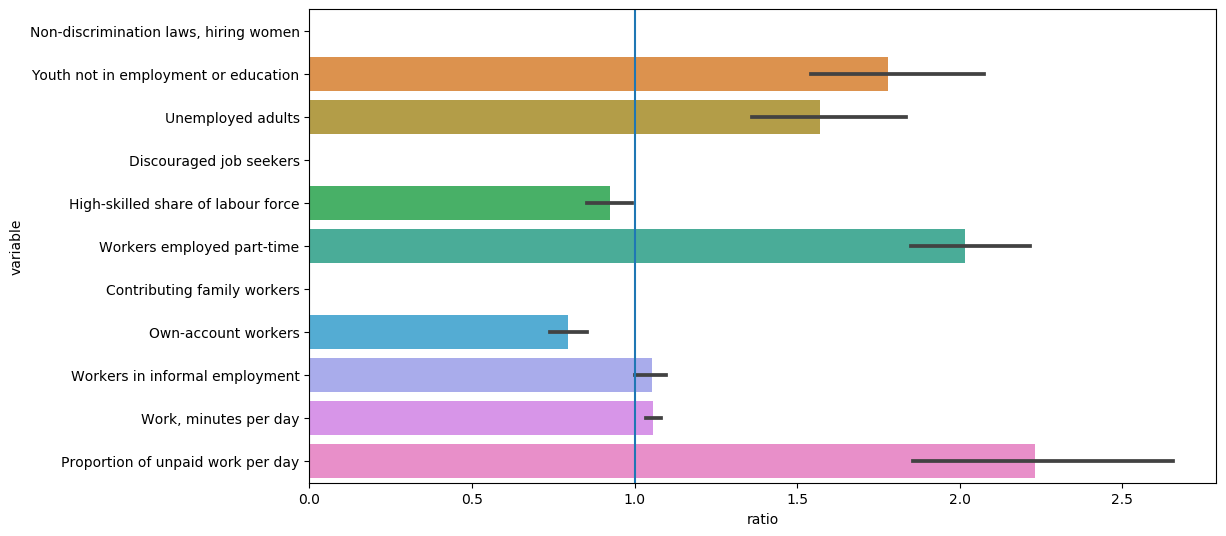

In [99]:
fig, ax = plt.subplots(figsize=(11.7, 6.27), dpi=100)
g = sns.barplot(y='variable', x='ratio', data=df2, ax=ax)
ax.axvline(x=1)
plt.show()
plt.close(fig)

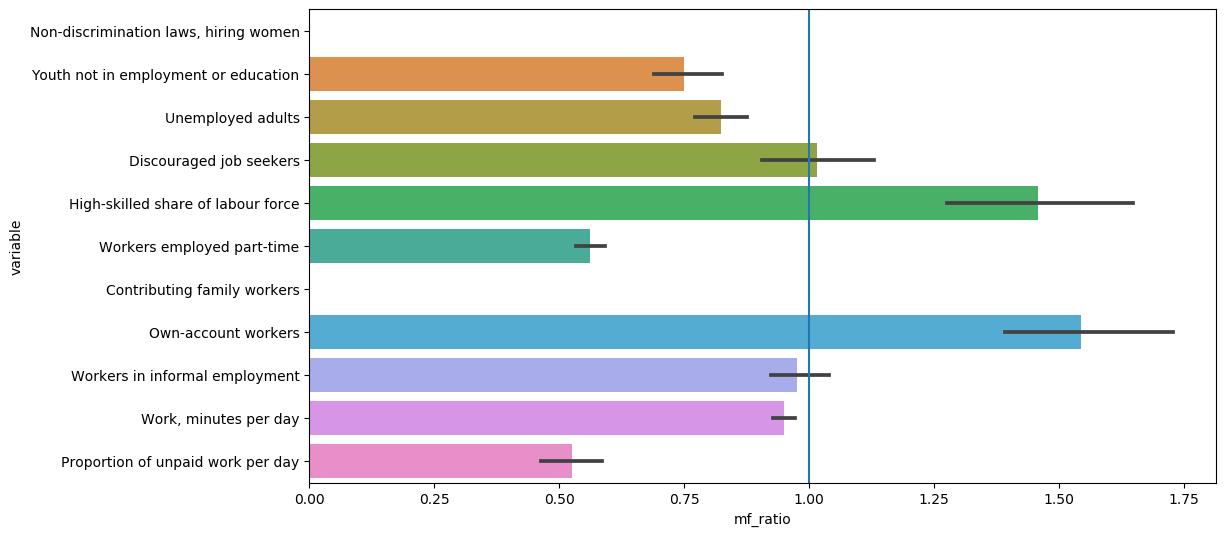

In [100]:
fig, ax = plt.subplots(figsize=(11.7, 6.27), dpi=100)
g = sns.barplot(y='variable', x='mf_ratio', data=df2, ax=ax)
ax.axvline(x=1)
plt.show()
plt.close(fig)